<a href="https://colab.research.google.com/github/letpires/bootcamp_alura/blob/main/Notebook_M%C3%B3dulo_04_An%C3%A1lise_e_Previs%C3%A3o_de_S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="darkslateblue">MÓDULO 04** - Análise e Previsão de Séries Temporais

##<font color="hotpink">**Aula 01. Série Temporal**

In [154]:
## Importação das bibliotecas que poderão ser usadas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [190]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [156]:
# Dados de casos confirmados de tuberculose no Brasil de 2001 a 2019.

url = "https://raw.githubusercontent.com/letpires/bootcamp_alura/main/modulo_04/datasets/casos_tuberculose_2001_2019.csv"

dados=pd.read_csv(url, encoding = "ISO-8859-1", sep=";",
                  skiprows=3, skipfooter=16, engine="python")

dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [157]:
dados.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


In [158]:
#Limpeza de colunas e linhas que não serão necessárias para a análise. Ex: Total.

dados.drop("Total", axis=1, inplace=True)
dados.drop(19, inplace=True)
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


###<font color="darkturquoise"> **Desafio 01: Transformar os dados em uma série temporal Ano-mês**

In [159]:
import datetime

Para realizar esse desafio, será criada uma função para unir os meses (coluna) com os anos (linha):

In [160]:
  meses_portugues_ingles = {
    'Jan': 'Jan', 'Fev': 'Feb',  'Mar': 'Mar', 'Abr': 'Apr',
    'Mai': 'May', 'Jun': 'Jun', 'Jul': 'Jul', 'Ago': 'Aug',
    'Set': 'Sep', 'Out': 'Oct', 'Nov': 'Nov', 'Dez': 'Dec'
}

def transforma_para_serie_temporal(df):
    dados_st = dados.copy()

    # Vai remover a coluna total, se tiver
    if 'Total' in dados_st.columns:
        dados_st = dados_st.drop('Total', axis=1)
    
    if any(dados_st['Ano Diagnóstico'] == 'Total'):
        dados_st.drop(dados_st[dados_st['Ano Diagnóstico'] == 'Total'].index,
                      axis=0, inplace=True)

    dados_st = dados_st.melt(id_vars='Ano Diagnóstico', value_name='Casos',
                             var_name='Mês')

    dados_st['Mês'] = dados_st['Mês'].map(meses_port_ing)
    dados_st['DataStr'] = dados_st['Ano Diagnóstico'] + '-' + dados_st['Mês']
    dados_st['Data'] = pd.to_datetime(dados_st['DataStr'])

    dados_st = dados_st.sort_values(by='Data').reset_index(drop=True)

    return dados_st[['Data', 'Casos']]

In [161]:
dados_serie_temporal=transforma_para_serie_temporal(dados2)
dados_serie_temporal

,Data,Casos
0,2001-01-01,8088
1,2001-02-01,6542
2,2001-03-01,8095
3,2001-04-01,7305
4,2001-05-01,7656
...,...,...
223,2019-08-01,8239
224,2019-09-01,8143
225,2019-10-01,8592
226,2019-11-01,7615


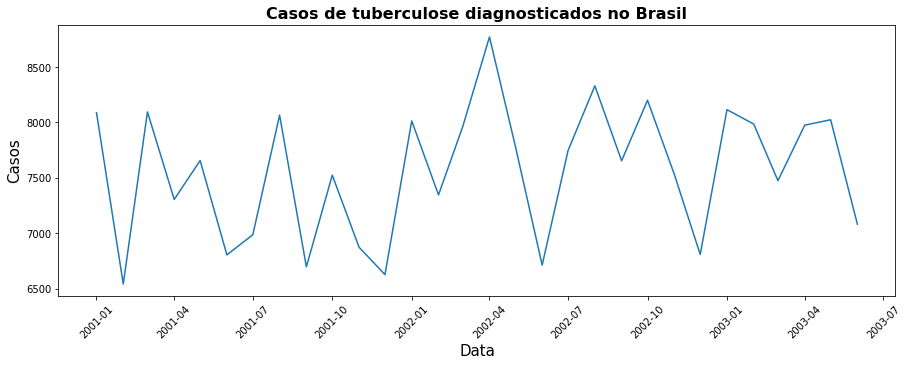

In [162]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_serie_temporal[:30])

plt.title("Casos de tuberculose diagnosticados no Brasil", fontsize=16, fontweight = "bold")
plt.ylabel("Casos", fontsize=15)
plt.xlabel("Data", fontsize=15)
plt.xticks(rotation=45)
plt.show()

###**Continuação da aula...**

In [163]:
dados_st = dados.melt(id_vars="Ano Diagnóstico", value_name="Casos", var_name="Mês")
dados_st

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [164]:
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+ dados_st["Mês"]
dados_st 

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


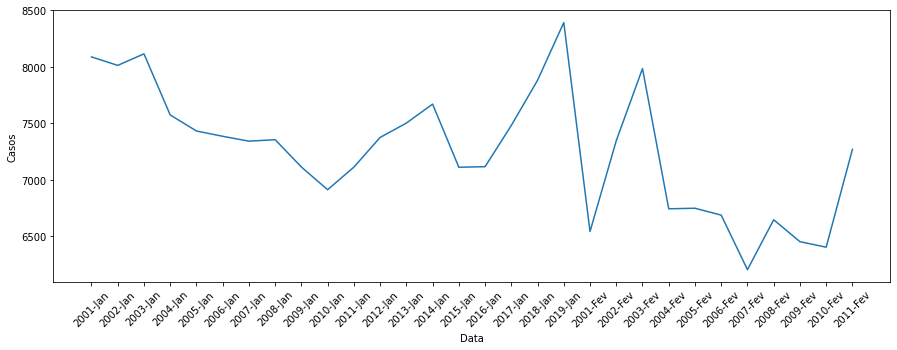

In [165]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st[:30])
plt.xticks(rotation=45)
plt.show()

In [166]:
#Está tratando Data como uma string (object) e não data
 
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mês              228 non-null    object
 2   Casos            228 non-null    int64 
 3   Data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


###<font color="darkturquoise"> **Desafio 02: Converter Data (string) em Datetime.**

In [167]:
#Fazer um cópia dos dados para não interferir na continuação da aula

dados3 = dados_st.copy()

In [168]:
dados3

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


In [169]:
 #colocando nomes dos meses para número

meses_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}


In [170]:
# substituindo os meses pelo dicionário ("Jan" por "1", etc)

dados3["Mês"] = dados3["Mês"].map(meses_ing)
dados3

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dez
224,2016,Dec,6672,2016-Dez
225,2017,Dec,7020,2017-Dez
226,2018,Dec,6900,2018-Dez


In [171]:
dados3["Data"] = dados3["Ano Diagnóstico"]+"-"+ dados3["Mês"]
dados3

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [172]:
dados3["Data"] = pd.to_datetime(dados3["Data"])
dados3

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dec,6844,2015-12-01
224,2016,Dec,6672,2016-12-01
225,2017,Dec,7020,2017-12-01
226,2018,Dec,6900,2018-12-01


In [173]:
dados3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.2+ KB


In [174]:
dados3=dados3[["Casos","Data"]]
dados3

,Casos,Data
0,8088,2001-01-01
1,8013,2002-01-01
2,8115,2003-01-01
3,7574,2004-01-01
4,7432,2005-01-01
...,...,...
223,6844,2015-12-01
224,6672,2016-12-01
225,7020,2017-12-01
226,6900,2018-12-01


##<font color="hotpink">**Aula 02. Manipulação de datas**

In [175]:
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


In [176]:
meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

dados_st["Mês"] = dados_st["Mês"].map(meses_port_ing)
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dez
224,2016,Dec,6672,2016-Dez
225,2017,Dec,7020,2017-Dez
226,2018,Dec,6900,2018-Dez


In [177]:
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+ dados_st["Mês"]
dados_st 

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [178]:
dados_st["Data"] = pd.to_datetime(dados_st["Data"])
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dec,6844,2015-12-01
224,2016,Dec,6672,2016-12-01
225,2017,Dec,7020,2017-12-01
226,2018,Dec,6900,2018-12-01


In [179]:
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.2+ KB


In [180]:
dados_st = dados_st[["Data", "Casos"]]
dados_st

,Data,Casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


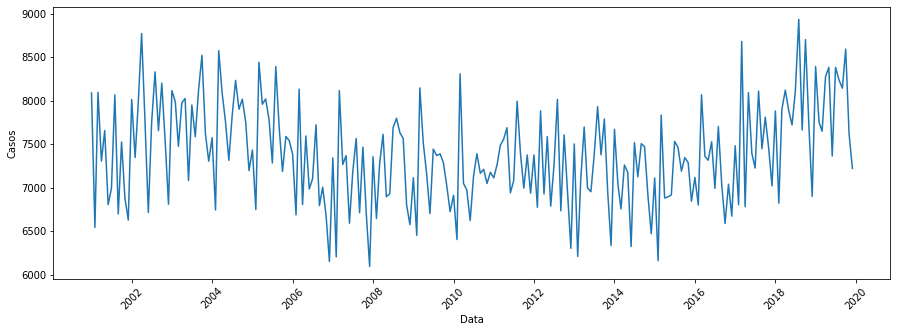

In [181]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Datetime padrão utiliza o inglês, então dá erro porque os meses estão 
#abreviados em português. Por isso, é necessário fazer um rename da coluna Date

#from datetime import datetime

#dados_st ["Data"]= pd.to_datetime(dados_st["Data"])
#dados_st ["Data"].dt.strftime('%Y-%m')

###<font color="darkturquoise"> **Desafio 03: Realizar os mesmos processos de transformação de série temporal para a base de dados da Hanseníase.**

In [182]:
# Dados de frequência de Hanseníase no Brasil de 1975 a 2019.

url_hanseniase = "https://raw.githubusercontent.com/letpires/bootcamp_alura/main/modulo_04/datasets/frequencia_hanseniase_2001_2019.csv"

dados_hanseniase = pd.read_csv(url_hanseniase, encoding = "ISO-8859-1", sep=";",
                  skiprows=3, skipfooter=10, engine="python")

dados_hanseniase.head()

,Ano DiagnÃ³stico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,4107,4103,4787,4135,4724,3940,4116,4890,4035,4728,4197,3250,51012
1,2002,3982,4065,4566,5027,4663,4488,4971,5281,4805,5151,4679,3545,55223
2,2003,4127,5918,5555,4965,5013,4476,4655,4844,5249,5257,4737,3874,58670
3,2004,4168,4169,5612,4557,5440,5299,4975,5640,4825,4233,4520,3925,57363
4,2005,4078,4241,4998,4628,4706,4559,4154,5457,4853,5196,5008,4209,56087


In [183]:
dados_hanseniase = dados_hanseniase.rename(columns={'Ano DiagnÃ³stico': 'Ano Diagnóstico'})
dados_hanseniase.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,4107,4103,4787,4135,4724,3940,4116,4890,4035,4728,4197,3250,51012
1,2002,3982,4065,4566,5027,4663,4488,4971,5281,4805,5151,4679,3545,55223
2,2003,4127,5918,5555,4965,5013,4476,4655,4844,5249,5257,4737,3874,58670
3,2004,4168,4169,5612,4557,5440,5299,4975,5640,4825,4233,4520,3925,57363
4,2005,4078,4241,4998,4628,4706,4559,4154,5457,4853,5196,5008,4209,56087


In [223]:
dados_hanseniase_st = transforma_para_serie_temporal (dados_hanseniase)
dados_hanseniase_st.head()

,Data,Casos
0,2001-01-01,8088
1,2001-02-01,6542
2,2001-03-01,8095
3,2001-04-01,7305
4,2001-05-01,7656


###<font color="darkturquoise"> **Desafio 04: Deixar o gráfico da série temporal bonitão.**

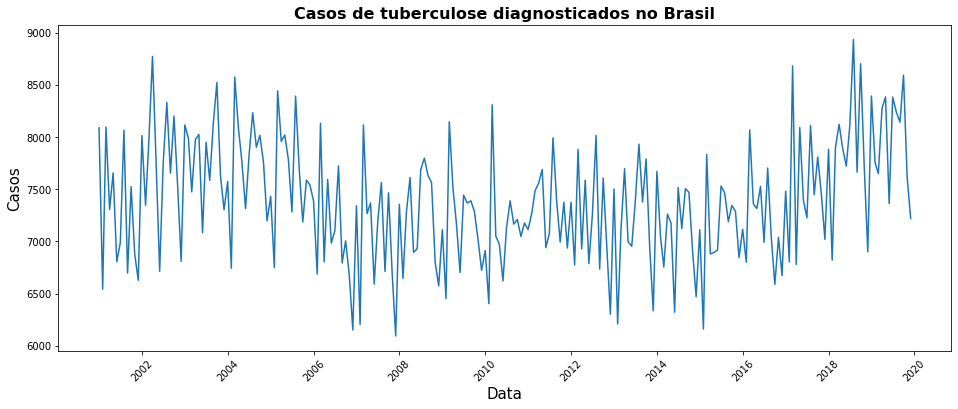

In [199]:
plt.figure(figsize=(16,6))
sns.lineplot(x="Data", y="Casos", data=dados_st)

plt.title("Casos de tuberculose diagnosticados no Brasil", fontsize=16, fontweight = "bold")
plt.ylabel("Casos", fontsize=15)
plt.xlabel("Data", fontsize=15)
plt.xticks(rotation=45)
plt.show()

##<font color="hotpink">**Aula 03. Iniciando a análise de série temporal**

In [ ]:
dados_st.sort_values(by=["Data"], inplace=True)
dados_st.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


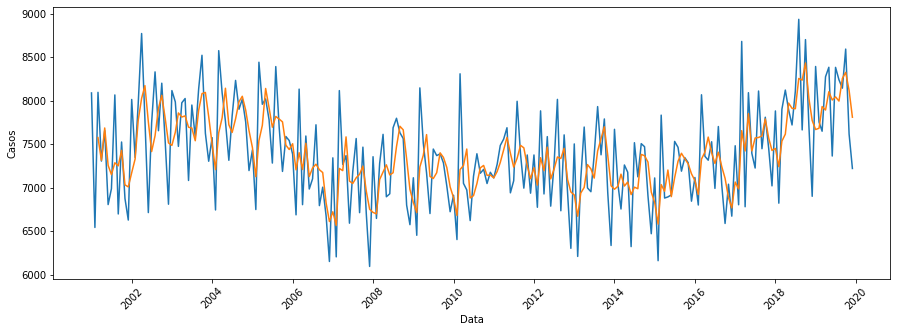

In [ ]:
#Calcular média móvel considerando os ultimos 3 meses
#rolling considera janela de tempo - 3 meses


dados_st["Media_Movel_3"] = dados_st["Casos"].rolling(3).mean()
plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st)
sns.lineplot(x="Data", y="Media_Movel_3", data=dados_st)
plt.xticks(rotation=45)
plt.show()

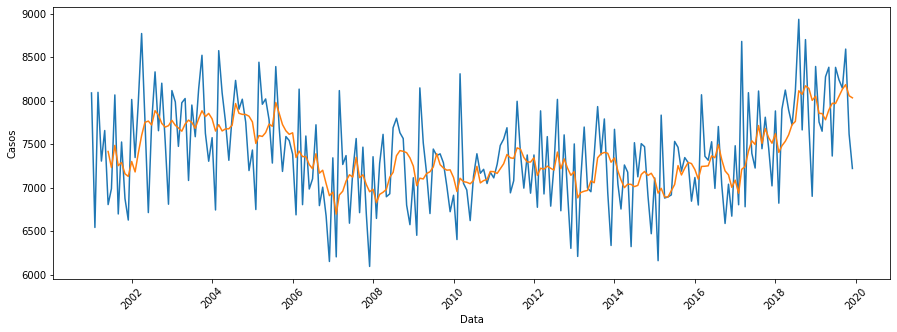

In [ ]:
dados_st["Media_Movel_6"] = dados_st["Casos"].rolling(6).mean()
plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st)
sns.lineplot(x="Data", y="Media_Movel_6", data=dados_st)
plt.xticks(rotation=45)
plt.show()

In [ ]:
dados_st

,Data,Casos,Media_Movel_3,Media_Movel_6
0,2001-01-01,8088,NaN,NaN
1,2001-02-01,6542,NaN,NaN
2,2001-03-01,8095,7575.000000,NaN
3,2001-04-01,7305,7314.000000,NaN
4,2001-05-01,7656,7685.333333,NaN
...,...,...,...,...
223,2019-08-01,8239,7994.666667,8048.166667
224,2019-09-01,8143,8254.666667,8130.666667
225,2019-10-01,8592,8324.666667,8183.666667
226,2019-11-01,7615,8116.666667,8055.666667


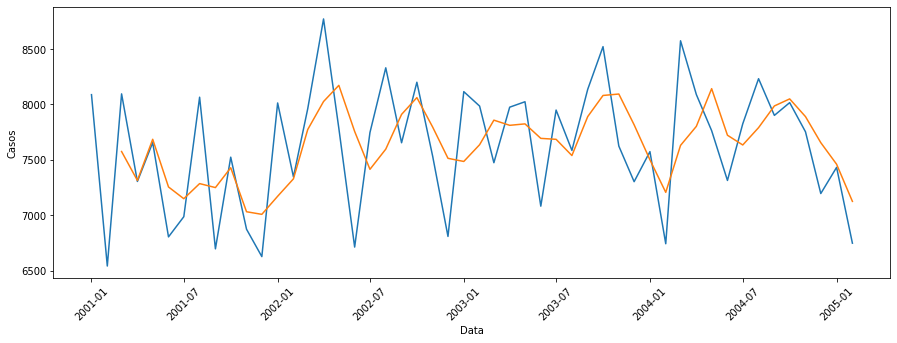

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st[:50])
sns.lineplot(x="Data", y="Media_Movel_3", data=dados_st[:50])
plt.xticks(rotation=45)
plt.show()

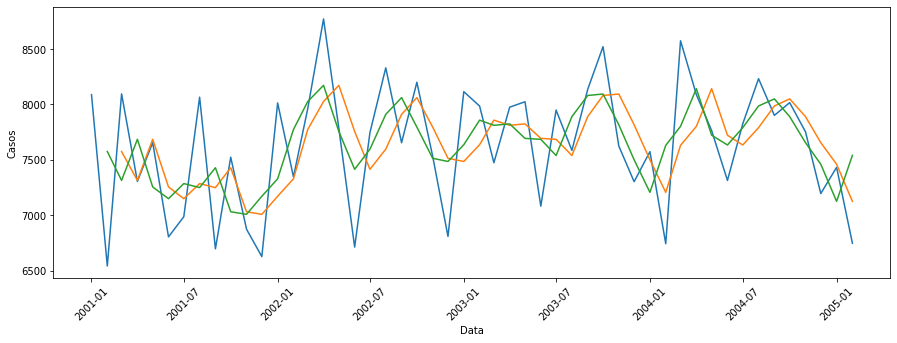

In [ ]:
dados_st["Media_Movel_3c"] = dados_st["Casos"].rolling(3, center=True).mean()
plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st[:50])
sns.lineplot(x="Data", y="Media_Movel_3", data=dados_st[:50])
sns.lineplot(x="Data", y="Media_Movel_3c", data=dados_st[:50])
plt.xticks(rotation=45)
plt.show()

###<font color="darkturquoise"> **Desafio 05: Analisar outras janelas para a média móvel.**

In [221]:
#def media_movel_hanseniase(df:pd.DataFrame, tempo:int, centrada:bool=True, inicio:int=0):


  # Fazendo uma janela de tempo para a média móvel
 # df[f"Media_movel_{str(tempo)}_meses"] = df["Casos"].rolling(tempo).mean()

  # Criando uma janela de tempo para a média móvel centrada 
  #df[f"Media_movel_centrada_{str(tempo)}_meses"]=df["Casos"].rolling(tempo, center=centrada).mean()

  
  #plt.figure(figsize=(15,5))
  #sns.lineplot(x="Data", y="Casos", data=df[inicio:540])
  #sns.lineplot(x="Data", y=f"Media_movel_{str(tempo)}_meses", data=df[inicio:540])
  #sns.lineplot(x="Data", y=f"Media_movel_centrada_{str(tempo)}_meses" , data=df[inicio:540])
  #plt.xticks(rotation=45)
  #plt.title("Série Temporal de Hanseníase no Brasil")
  #plt.legend(["Casos","Média Móvel","Média Móvel Centrada"])
  #plt.show()

In [226]:
dados_hanseniase_st['Média Móvel Trimestral'] = dados_hanseniase_st['Casos'].rolling(3, center=True).mean()
dados_hanseniase_st['Média Móvel Semestral'] = dados_hanseniase_st['Casos'].rolling(6, center=True).mean()
dados_hanseniase_st['Média Móvel Anual'] = dados_hanseniase_st['Casos'].rolling(12, center=True).mean()

dados_hanseniase_st.head()

,Data,Casos,Média Móvel Trimestral,Média Móvel Semestral,Média Móvel Anual
0,2001-01-01,8088,NaN,NaN,NaN
1,2001-02-01,6542,7575.000000,NaN,NaN
2,2001-03-01,8095,7314.000000,NaN,NaN
3,2001-04-01,7305,7685.333333,7415.166667,NaN
4,2001-05-01,7656,7255.333333,7231.666667,NaN


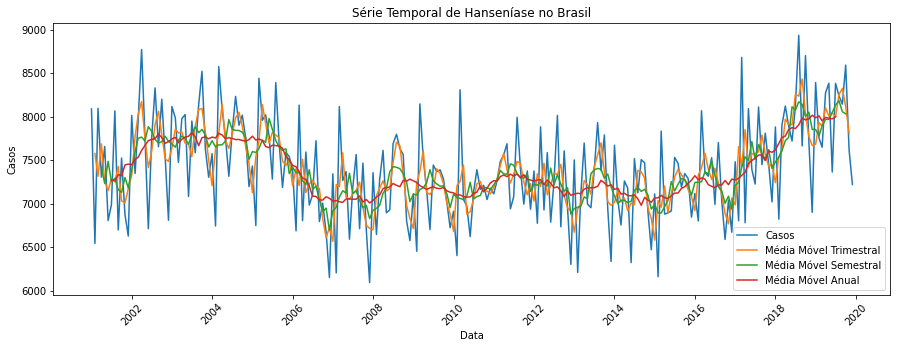

In [227]:
  plt.figure(figsize=(15,5))
  sns.lineplot(x="Data", y="Casos", data=dados_hanseniase_st)
  sns.lineplot(x="Data", y="Média Móvel Trimestral", data=dados_hanseniase_st)
  sns.lineplot(x="Data", y="Média Móvel Semestral", data=dados_hanseniase_st)
  sns.lineplot(x="Data", y="Média Móvel Anual", data=dados_hanseniase_st)
  plt.xticks(rotation=45)
  plt.title("Série Temporal de Hanseníase no Brasil")
  plt.legend(["Casos","Média Móvel Trimestral","Média Móvel Semestral", "Média Móvel Anual"])
  plt.show()

###<font color="darkturquoise"> **Desafio 06: Realizar sua previsão utilizando médias (toda série, 3 últimos meses).**

In [224]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12.0,8.0]

In [225]:
dados_hanseniase_previsao = transforma_para_serie_temporal (dados_hanseniase)
dados_hanseniase_previsao.head()

,Data,Casos
0,2001-01-01,8088
1,2001-02-01,6542
2,2001-03-01,8095
3,2001-04-01,7305
4,2001-05-01,7656


In [204]:
dados_hanseniase_previsao.dtypes

Data     datetime64[ns]
Casos             int64
dtype: object

In [205]:
dados_hanseniase_previsao = dados_hanseniase_previsao.set_index('Data')
dados_hanseniase_previsao.head()

,Casos
Data,
2001-01-01,8088
2001-02-01,6542
2001-03-01,8095
2001-04-01,7305
2001-05-01,7656


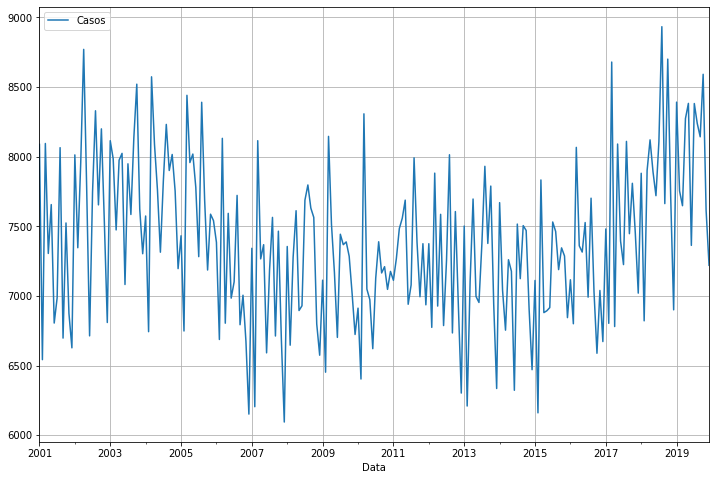

In [206]:
dados_hanseniase_previsao.plot(grid=True)

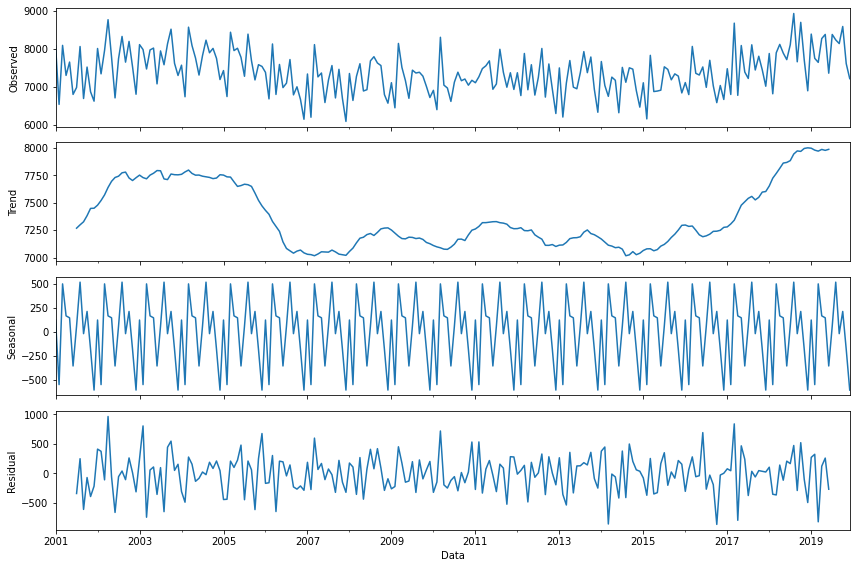

In [207]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(dados_hanseniase_previsao, model='additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]

In [229]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

ano = mdates.YearLocator (month = 1) 
mes = mdates.MonthLocator (interval = 3) 
ano_formato = mdates.DateFormatter ('% Y') 
mes_formato = mdates.DateFormatter ('% m')

ax.xaxis.set_minor_locator (mes) 
ax.xaxis.set_major_locator (ano) 
ax.xaxis.set_major_formatter (ano_formato)

plt.plot (dados_hanseniase_previsao.index, dados_hanseniase_previsao ['Casos'], c = 'blue') 
plt.plot (decomposition.trend.index, decomposition.trend, c = 'red')


plt.xticks(rotation=45)
plt.title("Casos ao longo do tempo e tendência")
plt.legend(["Casos","Tendência"])
plt.show()


ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fae33183730> (for post_execute):


ValueError: ignored

ValueError: ignored

##<font color="hotpink">**Aula 04. Decomposição e Autocorrelação**

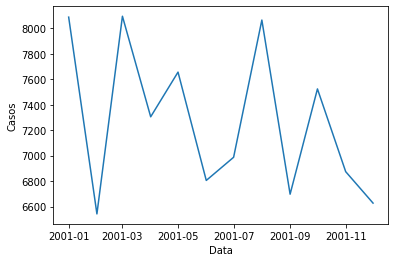

In [ ]:
sns.lineplot(x="Data", y="Casos", data=dados_st[:12])

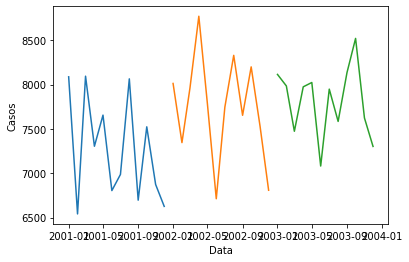

In [ ]:
sns.lineplot(x="Data", y="Casos", data=dados_st[:12])
sns.lineplot(x="Data", y="Casos", data=dados_st[12:24])
sns.lineplot(x="Data", y="Casos", data=dados_st[24:36])

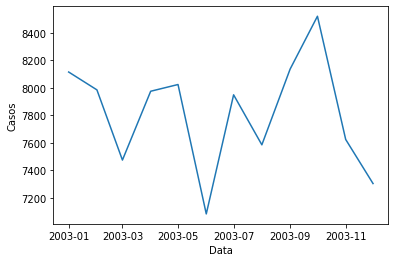

In [ ]:
sns.lineplot(x="Data", y="Casos", data=dados_st[24:36])

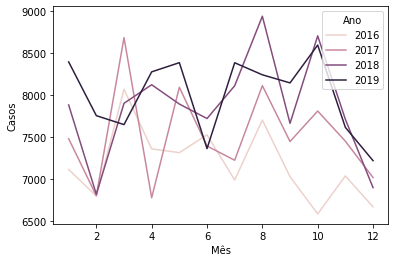

In [ ]:
#
dados_st["Ano"] = dados_st["Data"].dt.year
dados_st["Mês"] = dados_st["Data"].dt.month

sns.lineplot(x="Mês", y="Casos", data=dados_st.query("Ano in [2019, 2018, 2017, 2016]"), hue="Ano")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao = seasonal_decompose(dados_st[["Data", "Casos"]].set_index("Data"))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


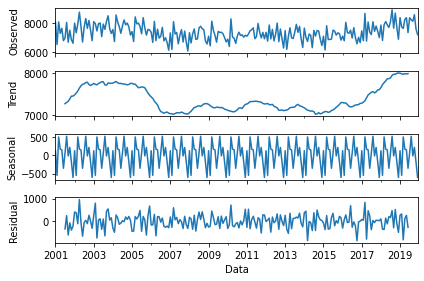

In [ ]:
#Gera gráficos de tendência, sazonalidade e resíduos.

decomposicao.plot();

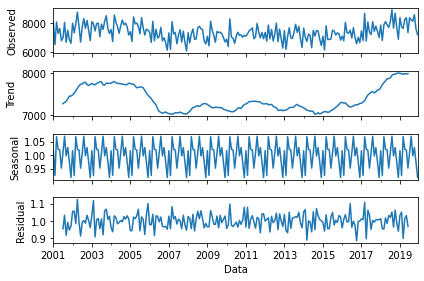

In [ ]:
decomposicao = seasonal_decompose(dados_st[["Data", "Casos"]].set_index("Data"), model="multiplicative")
decomposicao.plot();

In [ ]:
url_passageiros = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv"
dados_passageiros = pd.read_csv(url_passageiros)

In [ ]:
dados_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
dados_passageiros["Month"] = pd.to_datetime(dados_passageiros["Month"])
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


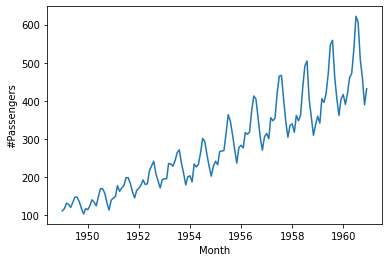

In [ ]:
sns.lineplot(x="Month", y="#Passengers", data=dados_passageiros)

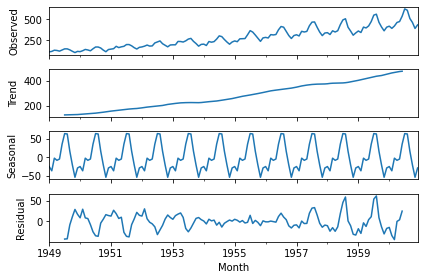

In [ ]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index("Month"))
decomposicao_p.plot();

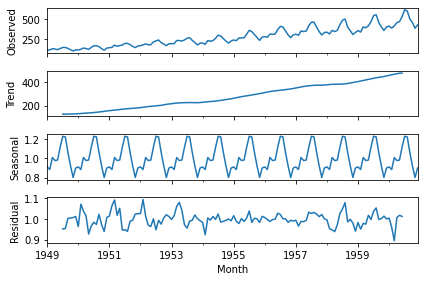

In [ ]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index("Month"), model="multiplicative")
decomposicao_p.plot();

###<font color="darkturquoise"> **Desafio 07:Transformar as datas em index e realizar os slices pelas datas.**

###<font color="darkturquoise"> **Desafio 08:Formatar os gráficos de decomposição, colocar título e modificar os tamanhos. Realizar a decomposição de outras séries temporais.**

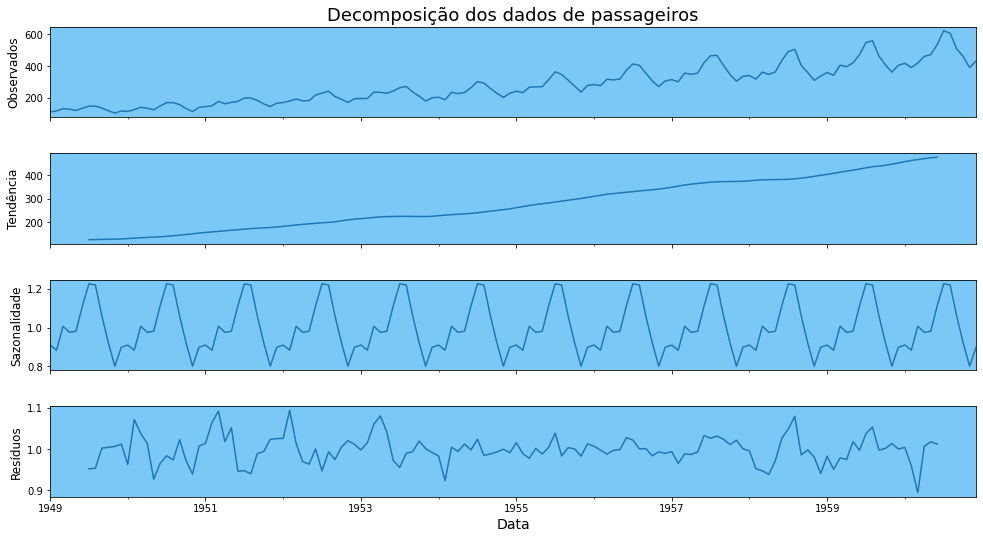

In [ ]:
# Plotar os dados da decomposição
figure = decomposicao_p.plot()
figure.axes[0].set_title('Decomposição dos dados de passageiros', fontsize=18)

# A linha acima adiciona o título e gera espaço para que ele caiba sem sobrepor
# O [0] representa o gráfico 0, acima desse gráfico porque é title.

figure.set_size_inches(15,8)
figure.axes[3].set_xlabel('Data', fontsize=14)
figure.axes[0].set_ylabel('Observados', fontsize=12)
figure.axes[1].set_ylabel('Tendência', fontsize=12)
figure.axes[2].set_ylabel('Sazonalidade', fontsize=12)
figure.axes[3].set_ylabel('Resíduos', fontsize=12)
figure.axes[3].set_facecolor('xkcd:lightblue')
figure.axes[2].set_facecolor('xkcd:lightblue')
figure.axes[1].set_facecolor('xkcd:lightblue')
figure.axes[0].set_facecolor('xkcd:lightblue')

figure;

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


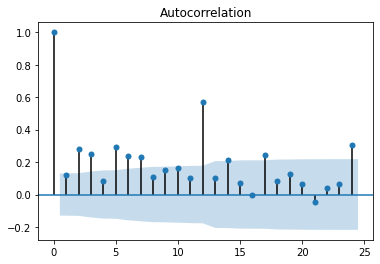

In [ ]:
plot_acf(dados_st["Casos"]);

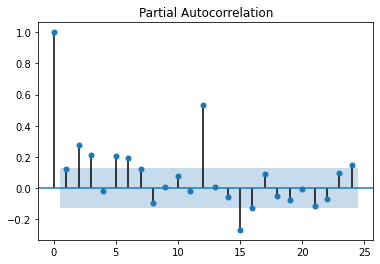

In [ ]:
plot_pacf(dados_st["Casos"]);

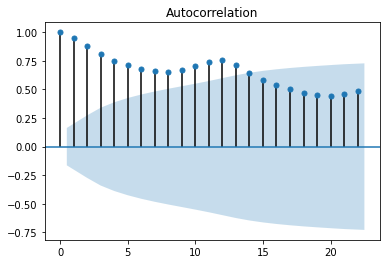

In [ ]:
plot_acf(dados_passageiros["#Passengers"]);

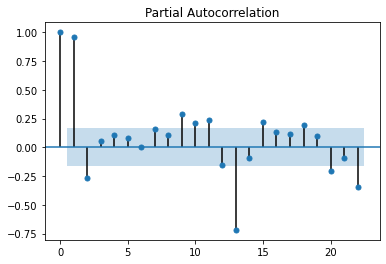

In [ ]:
plot_pacf(dados_passageiros["#Passengers"]);

###<font color="darkturquoise"> **Desafio 09: Realizar uma autocorrelação e autocorrelação parcial dos dados de COVID-19.**

In [ ]:
covid_zip = 'https://github.com/letpires/bootcamp_alura/blob/main/modulo_04/datasets/casos_covid.zip?raw=true'
dados_covid = pd.read_csv(covid_zip, sep=';', engine='python', compression='zip')
dados_covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [ ]:
# Realizando filtro com dados somente do Brasil

dados_covid = dados_covid[['data', 'casosNovos', 'obitosNovos']].iloc[:327]
dados_covid.tail()

,data,casosNovos,obitosNovos
322,2021-01-11,25822,480
323,2021-01-12,64025,1110
324,2021-01-13,60899,1274
325,2021-01-13,0,0
326,2021-01-14,67758,1131


In [ ]:
dados_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         327 non-null    object
 1   casosNovos   327 non-null    int64 
 2   obitosNovos  327 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.8+ KB


In [ ]:
dados_covid['data'] = pd.to_datetime(dados_covid['data'])
dados_covid.head()

,data,casosNovos,obitosNovos
0,2020-02-25,0,0
1,2020-02-26,1,0
2,2020-02-27,0,0
3,2020-02-28,0,0
4,2020-02-29,1,0


In [ ]:
dados_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         327 non-null    datetime64[ns]
 1   casosNovos   327 non-null    int64         
 2   obitosNovos  327 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 7.8 KB


##<font color="hotpink">**Aula 05. Previsões em séries temporais**